<a href="https://colab.research.google.com/github/rawatpremsingh999/tensorflow-coursera/blob/master/coursera_1403.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Network on real-world images

**Download the Image File:** This is a zip file containing images of humans and horses. 

In [7]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-01-05 06:06:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.240, 172.217.15.80, 172.217.12.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  77.2MB/s    in 1.8s    

2021-01-05 06:06:05 (77.2 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



We use python OS library for using operating system libraries and also use zipfile library for unzipping file.

In [8]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

**Note:** After executing above code, we see a horse-or-human directory in the tmp file. This file containing two sub-directories horses and humans. In this each subdirectory, containing respective computer generated .png images of different aspect ratios and sizes. 

**Here we did not label the data explicitly. It will automatically generate by ImageGenerator.**

Define each of sub-directories.

In [9]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

See how the horse and human images look like in the directory.

In [10]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse15-6.png', 'horse35-9.png', 'horse30-5.png', 'horse37-5.png', 'horse49-0.png', 'horse13-8.png', 'horse50-6.png', 'horse08-8.png', 'horse03-4.png', 'horse31-5.png']
['human11-04.png', 'human03-30.png', 'human06-20.png', 'human09-19.png', 'human11-01.png', 'human06-29.png', 'human09-16.png', 'human03-02.png', 'human17-26.png', 'human15-04.png']


Total Number of horse and human images

In [11]:
print('Total training horse images:', len(os.listdir(train_horse_dir)))
print('Total training human images:', len(os.listdir(train_human_dir)))

Total training horse images: 500
Total training human images: 527


See few images to get better sense of images that "how they look like?"

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Display a batch of 8 horse and 8 human pictures. <br> 
We can rerun the cell to see a fresh batch of images each time:

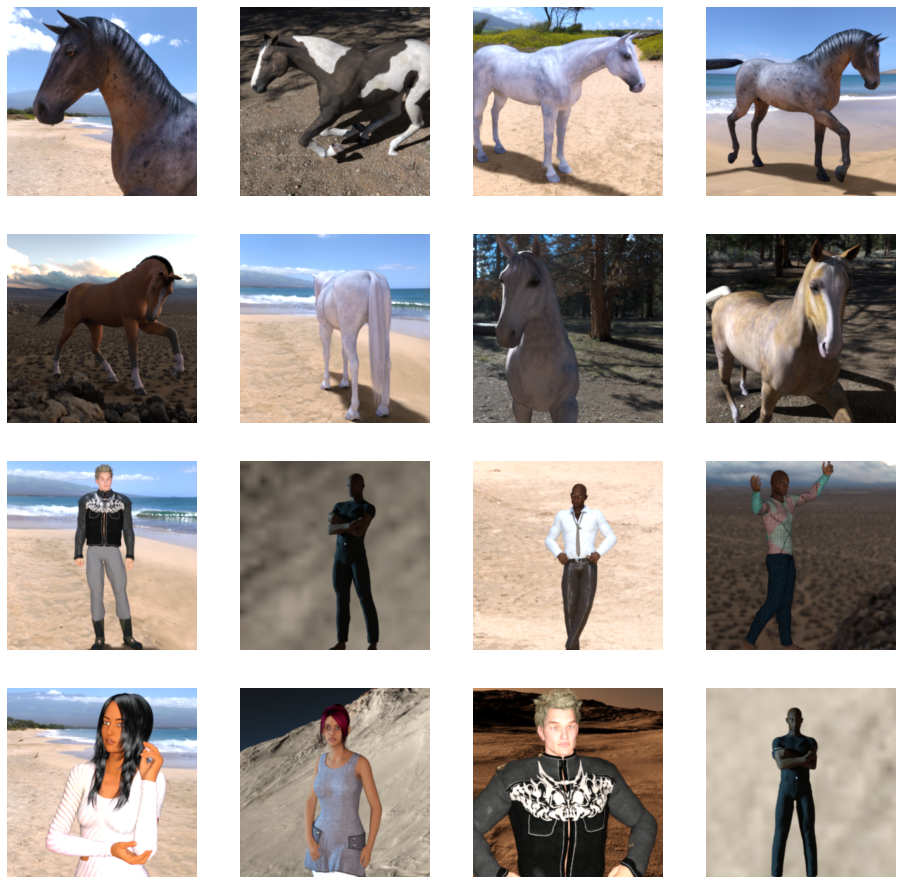

In [15]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Building a Network model from Scratch

In [16]:
import tensorflow as tf



*   First we add 2-D convolution layers 
*   then Flatten the result of convolution layers
*   Finally we add then densely connected layers
*   In the output layer, we use 1 unit with sigmoid activation because we have binary problem of classification.



In [22]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Summary of the Complete Network

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [26]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
# Images rescaled by 1/255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


**Training**

In [27]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 14s 861ms/step - loss: 0.8712 - accuracy: 0.5733
Epoch 2/15
8/8 [==============================] - 6s 736ms/step - loss: 0.8933 - accuracy: 0.7736
Epoch 3/15
8/8 [==============================] - 6s 753ms/step - loss: 0.5461 - accuracy: 0.8515
Epoch 4/15
8/8 [==============================] - 6s 729ms/step - loss: 0.2308 - accuracy: 0.9183
Epoch 5/15
8/8 [==============================] - 6s 755ms/step - loss: 0.6830 - accuracy: 0.7622
Epoch 6/15
8/8 [==============================] - 7s 850ms/step - loss: 0.1801 - accuracy: 0.9313
Epoch 7/15
8/8 [==============================] - 6s 751ms/step - loss: 0.5607 - accuracy: 0.8816
Epoch 8/15
8/8 [==============================] - 6s 751ms/step - loss: 0.1724 - accuracy: 0.9362
Epoch 9/15
8/8 [==============================] - 6s 731ms/step - loss: 0.0699 - accuracy: 0.9777
Epoch 10/15
8/8 [==============================] - 6s 865ms/step - loss: 0.0786 - accuracy: 0.9721
Epoch 11/15
8/8 [=

In [29]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving beauty-1462986_640.jpg to beauty-1462986_640 (1).jpg
Saving horse-3419146_640.jpg to horse-3419146_640 (1).jpg
[1.]
beauty-1462986_640.jpg is a human
[0.]
horse-3419146_640.jpg is a horse
